In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

%matplotlib inline

In [2]:
sea_df = pd.read_csv("epa-sea-level.csv")
sea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      144 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   31 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.8 KB


(24,)


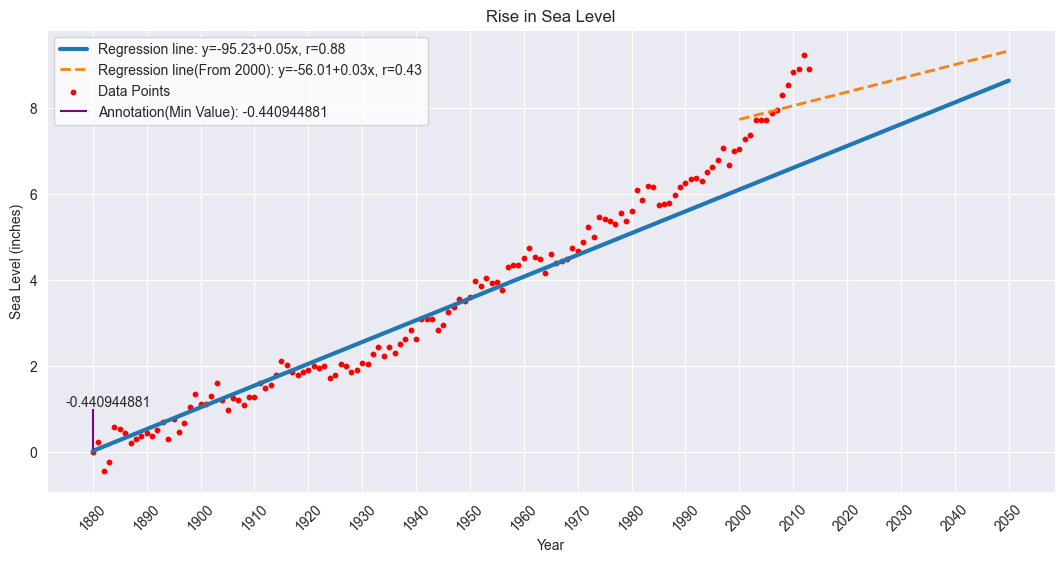

<Figure size 640x480 with 0 Axes>

In [109]:
# Line of best fit

year_arr = np.array(sea_df["Year"])
adjusted_sea_level_arr = np.array(sea_df["CSIRO Adjusted Sea Level"].fillna(sea_df["CSIRO Adjusted Sea Level"].mean(),axis=0,inplace=False))
slope, intercept, r, p, stderr = ss.linregress(year_arr,adjusted_sea_level_arr)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Creating the residual error

predicted_value = (slope*year_arr)+intercept
residuals = predicted_value - adjusted_sea_level_arr


# Generating fig

fig,ax = plt.subplots(figsize=(13,6))
sns.set_style("dark")

# Plot the line of best fit till 2050.

xtick_range = np.arange(start=np.max(year_arr),stop=2050+1,step=1)
pred = [(slope*prediction)+intercept for prediction in xtick_range]
year_arr = np.append(year_arr,xtick_range)
predicted_value = np.append(predicted_value,pred)
ax.plot(year_arr,predicted_value,label=line,linewidth=3)

# Plot aother line starting from year=2000.

filtered_year = sea_df.query("Year >= 2000").reset_index()
filtered_year["CSIRO Adjusted Sea Level"] = filtered_year["CSIRO Adjusted Sea Level"].fillna(filtered_year["CSIRO Adjusted Sea Level"]
                                                                                             .mean(),axis=0)

slope_2, intercept_2, r_2, p_2, stderr_2 = ss.linregress(filtered_year["Year"],filtered_year["CSIRO Adjusted Sea Level"])
predicted_value_from_2000 = (slope_2*filtered_year["Year"])+intercept_2
print(predicted_value_from_2000.shape)

xtick_range_2 = np.arange(np.max(filtered_year["Year"]),stop=2050+1,step=1)
pred_y_filtered = [(slope_2*prediction_2)+intercept_2 for prediction_2 in xtick_range_2]
from_2000_year = np.append(filtered_year["Year"],xtick_range_2)
from_2000_pred = np.append(predicted_value_from_2000,pred_y_filtered)

line_post_2000 = f'Regression line(From 2000): y={intercept_2:.2f}+{slope_2:.2f}x, r={r_2:.2f}'
ax.plot(from_2000_year,from_2000_pred,label=line_post_2000,linewidth=2,linestyle="--")


# Creating the scatter plot

size = np.linspace(start=abs(np.min(sea_df["CSIRO Adjusted Sea Level"]))*2,stop=np.max(sea_df["CSIRO Adjusted Sea Level"])*2,num=len(sea_df))
ax.scatter(x=sea_df["Year"],y=sea_df["CSIRO Adjusted Sea Level"],s=10,marker="o",
           color="red",label='Data Points')

# Adding details to the plot

x,y = (min(sea_df["Year"])-5,min(sea_df["CSIRO Adjusted Sea Level"])+1.5)
ax.grid(True)
ax.set_title("Rise in Sea Level")

# single line 
plt.vlines(x =min(sea_df["Year"]), ymin = min(sea_df["CSIRO Adjusted Sea Level"])+0.5
           , ymax = 1,colors = 'purple',label = f'Annotation(Min Value): {min(sea_df["CSIRO Adjusted Sea Level"])}')
ax.annotate(str(min(sea_df["CSIRO Adjusted Sea Level"])),xy=(x,y))
ax.set_xticks(np.arange(min(sea_df["Year"]),2050+1,10))
for xtick_label in ax.get_xticklabels():
    xtick_label.set_rotation(45)
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.legend(facecolor="white")
plt.show()
plt.clf()

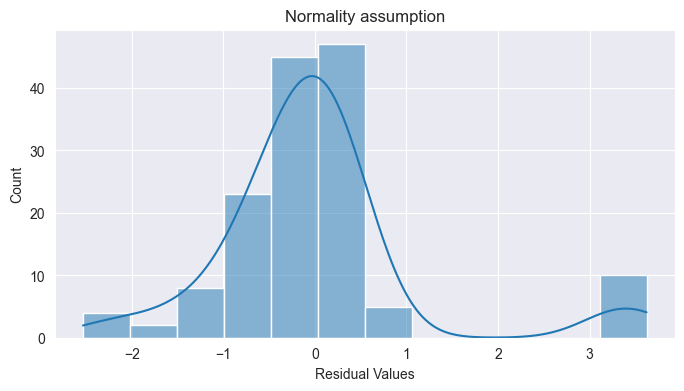

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calc the residuals
residuals = predicted_value - adjusted_sea_level_arr

# Creating the normal plot on residuals
bins = int(np.sqrt(len(year_arr)))
plt.figure(figsize=(8,4))
sns.histplot(residuals,bins=bins,kde=True)
plt.plot()
plt.title("Normality assumption")
plt.xlabel("Residual Values")
plt.grid(True)
plt.show()
plt.clf()


#### Observations:
Looking at the scatterplot there seems to be a strong positive relationship between the independent and predicted variable. The data points are nested around the line of best fit. However the there is spike in sea levels post the year 2000 which could suggest rising population and climate change. 
The y-intercept can be interprated as: Since the year cannot be 0, we can say from the minimum year from the dataset (1880) the sea level was around 0. For each year there has been an increase of the sea level by 0.05 inches. 
To check for linear regression, the colinearity and a normal distribution of the residuals has been made.(Normality assumption)